In [26]:
# Importing necessary libraries for data manipulation, visualization, and model building// TPU=Tensor processing unit. tensor is arrays
import matplotlib.pyplot as plt
from keras.layers import Dense, Flatten # Flatten=
from keras.models import Sequential # Sequential=MLP layers one after the other/sequential
from keras.utils import to_categorical # converting image in to number/arrays
from keras.datasets import mnist # import mnit dataset
from keras import utils # used for multiple task

import warnings
warnings.filterwarnings('ignore')

In [27]:
# Import the necessary module from Keras
from keras.datasets import mnist

# Load the MNIST dataset, which is a dataset of handwritten digits
# x_train and y_train are the training data and labels respectively
# x_test and y_test are the testing data and labels respectively
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [28]:
print(y_test.shape)

(10000,)


In [29]:
# Display the shape of the x_train array
# x_train is the array containing the training data (images of handwritten digits)
# The shape attribute returns a tuple representing the dimensions of the array
# This helps to understand the number of training samples and their dimensions
print(x_train.shape)

(60000, 28, 28)


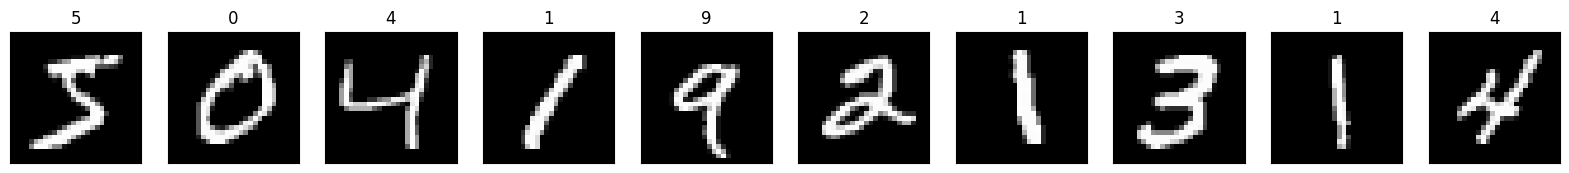

In [30]:
# Let's plot the first 10 images from the training dataset
# Create a figure and an array of subplots
# ncols=10: Specifies the number of columns in the subplot grid (10 columns)
# sharex=False: Determines whether the x-axis is shared among subplots (not shared)
# sharey=True: Determines whether the y-axis is shared among subplots (shared)
# figsize=(20, 4): Specifies the width and height of the figure in inches (20 inches wide, 4 inches tall)
fig, axes = plt.subplots(ncols=10, sharex=False, sharey=True, figsize=(20, 4))
# Loop through the first 10 images
for i in range(10):
    # Set the title of each subplot to the corresponding label in y_train
    axes[i].set_title(y_train[i])
    # Display each image in grayscale
    axes[i].imshow(x_train[i], cmap='gray')
    # Hide the x-axis
    axes[i].get_xaxis().set_visible(False)
    # Hide the y-axis
    axes[i].get_yaxis().set_visible(False)

# Show the plot
plt.show()

In [31]:
# Let's convert the labels to categorical format
# This code converts the labels into a one-hot encoded format with 10 dimensions
# Each label will be represented as a binary vector of length 10
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [32]:
# Let's check how the labels look after converting to categorical format
print(y_train [0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [33]:
# Let's check the y_test labels to see how they look after conversion to categorical format
print(y_test)

[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [34]:
# Let's check the shape of the y_test array
# This provides information about the dimensions of the y_test array
print(y_test.shape)

(10000, 10)


In [35]:

# Define a Sequential model, which allows adding layers sequentially
model = Sequential()

# Add a Flatten layer to convert the 28x28 input images into a 1D array
# Input shape is set to (28, 28) representing the dimensions of the input images
model.add(Flatten(input_shape=(28, 28)))

# Add a Dense layer with 10 neurons and 'sigmoid' activation function
model.add(Dense(10, activation='sigmoid'))

# Add another Dense layer with 5 neurons and 'sigmoid' activation function
model.add(Dense(5, activation='sigmoid'))

# Add the output layer with 10 neurons (one for each class) and 'softmax' activation function
# Softmax is used for multi-class classification to output probabilities for each class
model.add(Dense(10, activation='softmax'))

In [36]:
# Display a summary of the model architecture, including the number of parameters in each layer
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         7,850 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 5)              │            55 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │            60 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,965 (31.11 KB)

 Trainable params: 7,965 (31.11 KB)

 Non-trainable params: 0 (0.00 B)

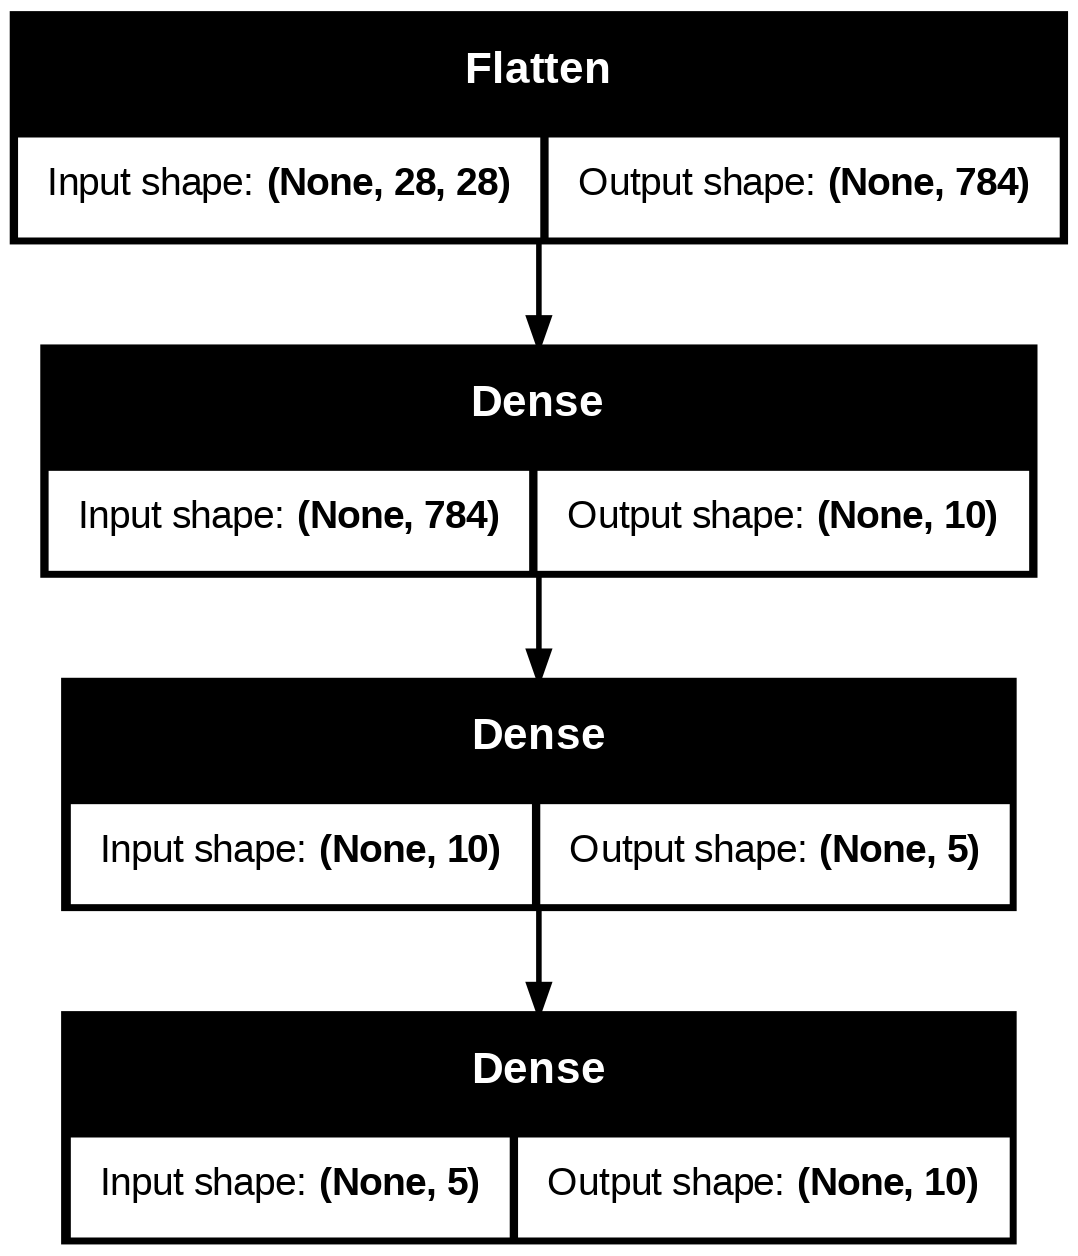

In [37]:
# Visualize the architecture of the model with its layer shapes
utils.plot_model(model, show_shapes=True)

In [38]:
# Compile the model with categorical crossentropy loss, Adam optimizer, and accuracy metric
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [39]:
# Train the model for one epoch on the training data and validate on the test data, storing the training history
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - acc: 0.3689 - loss: 1.9819 - val_acc: 0.6330 - val_loss: 1.2762
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - acc: 0.6243 - loss: 1.2097 - val_acc: 0.6605 - val_loss: 0.9982
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - acc: 0.6743 - loss: 0.9812 - val_acc: 0.7276 - val_loss: 0.9314
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - acc: 0.7099 - loss: 0.8870 - val_acc: 0.6824 - val_loss: 0.8796
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - acc: 0.7086 - loss: 0.8489 - val_acc: 0.7585 - val_loss: 0.7689


In [40]:
# Saving the trained model to a file named 'mnist_models_scifer.h5'
model.save('mnist_models_scifers.h5')

In [41]:
# Printing the training history containing the loss and accuracy metrics
print(history.history)

{'acc': [0.49488332867622375, 0.6428166627883911, 0.6821333169937134, 0.7037333250045776, 0.7153666615486145], 'loss': [1.7163740396499634, 1.1366020441055298, 0.9545804262161255, 0.8795986771583557, 0.8367490768432617], 'val_acc': [0.6330000162124634, 0.6604999899864197, 0.7275999784469604, 0.6823999881744385, 0.7584999799728394], 'val_loss': [1.276245355606079, 0.9981828927993774, 0.9314259886741638, 0.8796210885047913, 0.7688683271408081]}


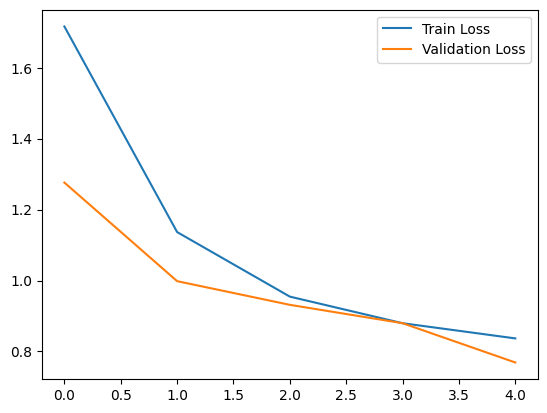

In [42]:
# Plotting the training loss curve
plt.plot(history.history['loss'], label='Train Loss')

# Plotting the validation loss curve
plt.plot(history.history['val_loss'], label='Validation Loss')

# Adding legend to the plot
plt.legend()

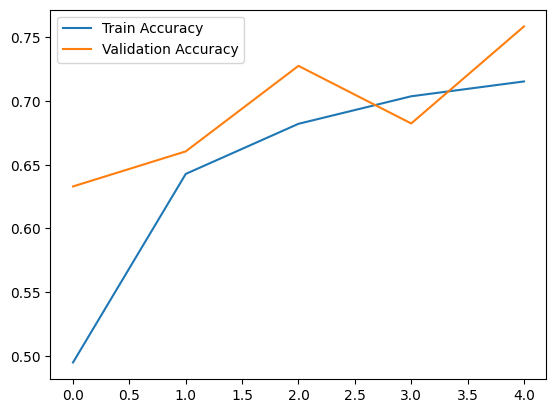

In [43]:
# Plotting the training accuracy curve
plt.plot(history.history['acc'], label='Train Accuracy')

# Plotting the validation accuracy curve
plt.plot(history.history['val_acc'], label='Validation Accuracy')

# Adding legend to the plot
plt.legend()

In [44]:
# Importing TensorFlow library
import tensorflow as tf

In [45]:
# Loading the pre-trained model from the file 'mnist_models_scifer.h5'
model = tf.keras.models.load_model('mnist_models_scifers.h5')

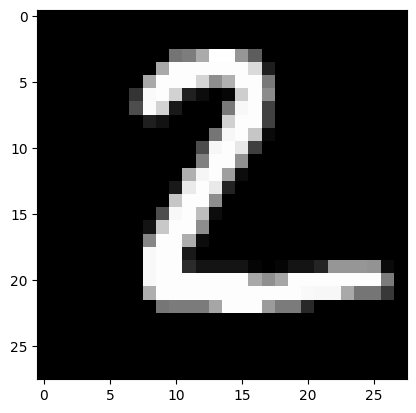

In [46]:
# Displaying the first test image from the dataset
plt.imshow(x_test[1], cmap='gray')

In [47]:

# Importing the NumPy library
import numpy as np

# Reshaping the first test image to match the model's input shape
x = np.reshape(x_test[1], (1, 28, 28))

# Using the trained model to predict the class label for the input image
predicted_label = np.argmax(model.predict(x))

# Printing the predicted class label
print(predicted_label)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
2
